# Demand-Supply Analysis and Strategic Optimization for Ride-Hailing Operations

In this project, I will analyze jeeny's supply and demand datasets, in order to make a clear idea about the peak hours, in which there is no sufficient supply to service the demand volume. Also, I will calculate the required online hours that is needed to achieve a good FF% during these peak hours. Lastly, I will try to predict the number of boarded rides that we will have in week 15, given the information that one of our competitors will close their operations.

So that, this analysis project consists of three parts:


1.   Identifying undersupply patterns and peak demand hours.
2.   Estimating required online hours for good fulfillment.
3.   Forecasting impact of competitor exit and strategic recommendations.





Lets start by loading the supply and demand datasets into pandas dataframes.

In [18]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file1_path = '/content/drive/MyDrive/supply_data - Sheet1.csv'
supply = pd.read_csv(file1_path)

file2_path = '/content/drive/MyDrive/demand_data - Sheet1.csv'
demand = pd.read_csv(file2_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
supply.head()

,Date,TotalBoardedDrivers,Active Drivers,OnlineHours,HasBooking,WaitingforBooking,HoursperActiveDriver,RidesperOnlineHour
0,1/26/2025 0:16:10,75,142,169.24,40.48,128.76,1.19,0.92
1,1/26/2025 1:56:29,42,60,81.07,19.39,61.68,1.35,1.25
2,1/26/2025 2:17:27,35,49,75.38,18.03,57.35,1.54,1.21
3,1/26/2025 3:54:27,35,51,89.60,21.43,68.17,1.76,1.40
4,1/26/2025 4:28:49,22,26,36.98,8.84,28.13,1.42,3.27


In [20]:
demand.head()

,Date,TotalPriceChecks,RidesRequests,Unfulfilled Requests,RidesBoarded-Detailed
0,1/26/2025 0:16:10,246,156,58,98
1,1/26/2025 1:56:29,144,101,50,51
2,1/26/2025 2:17:27,121,91,46,45
3,1/26/2025 3:54:27,188,125,85,40
4,1/26/2025 4:28:49,187,121,93,28


In [21]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1680 non-null   object 
 1   TotalBoardedDrivers   1680 non-null   int64  
 2   Active Drivers        1680 non-null   int64  
 3   OnlineHours           1680 non-null   float64
 4   HasBooking            1680 non-null   float64
 5   WaitingforBooking     1680 non-null   float64
 6   HoursperActiveDriver  1680 non-null   float64
 7   RidesperOnlineHour    1680 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 105.1+ KB


In [22]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1680 non-null   object
 1   TotalPriceChecks       1680 non-null   object
 2   RidesRequests          1680 non-null   object
 3   Unfulfilled Requests   1680 non-null   object
 4   RidesBoarded-Detailed  1680 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 65.8+ KB


We need to convert these three columns into integers so that we can perform calculations on them.

In [23]:
demand['TotalPriceChecks'] = demand['TotalPriceChecks'].str.replace(',', '').astype(int)
demand['Unfulfilled Requests'] = demand['Unfulfilled Requests'].str.replace(',', '').astype(int)
demand['RidesRequests'] = demand['RidesRequests'].str.replace(',', '').astype(int)

Sense the "Date" column is a common column between these two tables, we can join these tables using the "Date" column, this will make my analysis easier and more organized.

In [24]:
merged = pd.merge(supply, demand, on='Date')
merged.head()

,Date,TotalBoardedDrivers,Active Drivers,OnlineHours,HasBooking,WaitingforBooking,HoursperActiveDriver,RidesperOnlineHour,TotalPriceChecks,RidesRequests,Unfulfilled Requests,RidesBoarded-Detailed
0,1/26/2025 0:16:10,75,142,169.24,40.48,128.76,1.19,0.92,246,156,58,98
1,1/26/2025 1:56:29,42,60,81.07,19.39,61.68,1.35,1.25,144,101,50,51
2,1/26/2025 2:17:27,35,49,75.38,18.03,57.35,1.54,1.21,121,91,46,45
3,1/26/2025 3:54:27,35,51,89.60,21.43,68.17,1.76,1.40,188,125,85,40
4,1/26/2025 4:28:49,22,26,36.98,8.84,28.13,1.42,3.27,187,121,93,28


In [25]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1680 non-null   object 
 1   TotalBoardedDrivers    1680 non-null   int64  
 2   Active Drivers         1680 non-null   int64  
 3   OnlineHours            1680 non-null   float64
 4   HasBooking             1680 non-null   float64
 5   WaitingforBooking      1680 non-null   float64
 6   HoursperActiveDriver   1680 non-null   float64
 7   RidesperOnlineHour     1680 non-null   float64
 8   TotalPriceChecks       1680 non-null   int64  
 9   RidesRequests          1680 non-null   int64  
 10  Unfulfilled Requests   1680 non-null   int64  
 11  RidesBoarded-Detailed  1680 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 157.6+ KB


No missing values, So far so good.

In [26]:
merged.columns

Index(['Date', 'TotalBoardedDrivers', 'Active Drivers', 'OnlineHours',
       'HasBooking', 'WaitingforBooking', 'HoursperActiveDriver',
       'RidesperOnlineHour', 'TotalPriceChecks', 'RidesRequests',
       'Unfulfilled Requests', 'RidesBoarded-Detailed'],
      dtype='object')

It will be useful if I created a "WeekDay" and "hours" columns.

In [27]:
merged['WeekDay'] = pd.to_datetime(merged['Date']).dt.day_name()

In [28]:
merged['hours'] = pd.to_datetime(merged['Date']).dt.hour

In [29]:
merged.head()

,Date,TotalBoardedDrivers,Active Drivers,OnlineHours,HasBooking,WaitingforBooking,HoursperActiveDriver,RidesperOnlineHour,TotalPriceChecks,RidesRequests,Unfulfilled Requests,RidesBoarded-Detailed,WeekDay,hours
0,1/26/2025 0:16:10,75,142,169.24,40.48,128.76,1.19,0.92,246,156,58,98,Sunday,0
1,1/26/2025 1:56:29,42,60,81.07,19.39,61.68,1.35,1.25,144,101,50,51,Sunday,1
2,1/26/2025 2:17:27,35,49,75.38,18.03,57.35,1.54,1.21,121,91,46,45,Sunday,2
3,1/26/2025 3:54:27,35,51,89.60,21.43,68.17,1.76,1.40,188,125,85,40,Sunday,3
4,1/26/2025 4:28:49,22,26,36.98,8.84,28.13,1.42,3.27,187,121,93,28,Sunday,4


now, we are ready to start our analysis.


---


---





## Part 1: Identifying Undersupply Patterns and Peak Demand Hours

Before we begin with our analysis, lets define what **supply** and **demand** actually are?

**Supply**: is the amount of goods or services that the customers are willing and **able to buy**.

**Demand**: is the amount of customers who wants and **able** to actually buy our goods or services.





---





Based on these definitions, in our case study, the supply is the number of **available drivers**, that is, the number of drivers who are not taking a ride during a given hour.

This is because the fact that the customers must be able to buy the good or service to consider it as supply, and if the driver is on a ride, this means that he is bussy right now and not able to recieve any ride requests from the customers.

In order to estimate the number of available drivers during a given hour, we need to use two columns:

"**WaitingforBooking**": this column represents the amount of hours that the drivers spend waiting for ride requests during an hour.

"**HoursperActiveDriver**": this column represents the average number of hours a driver spend in the **Active** state (either has a booking currently or is waiting for booking).

If we divide the "WaitingforBooking" by the "HoursperActiveDriver" we will get an estimation of the number of drivers who are waiting for a booking (available drivers), during an hour, **which represents the actual supply according to our definition above**.  

In [30]:
merged['AvailableDrivers'] = merged['WaitingforBooking'] / merged['HoursperActiveDriver']

In terms of **demand**, the demand in our case is represented using the "**RidesRequests**" column, which represents the number of customers who wants to book a ride during an hour, **which is the actual demand according to our definition above**.

now, lets visualize a line chart that shows the average supply and demand curves during 24 hours.

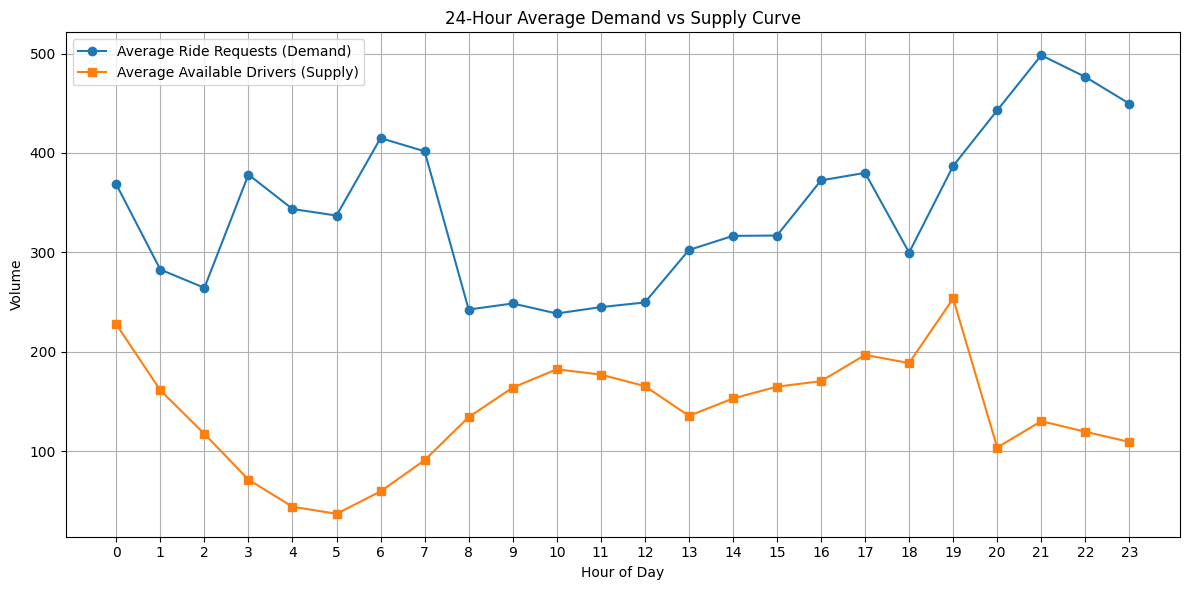

In [31]:
import matplotlib.pyplot as plt

hourly_avg = merged.groupby('hours')[['RidesRequests', 'AvailableDrivers']].mean()

plt.figure(figsize=(12,6))
plt.plot(hourly_avg.index, hourly_avg['RidesRequests'], label='Average Ride Requests (Demand)', marker='o')
plt.plot(hourly_avg.index, hourly_avg['AvailableDrivers'], label='Average Available Drivers (Supply)', marker='s')

plt.title('24-Hour Average Demand vs Supply Curve')
plt.xlabel('Hour of Day')
plt.ylabel('Volume')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Observation from the chart:


*   The blue curve (RidesRequests) is consistently above the orange curve (AvailableDrivers).
*   This indicates that demand exceeds available driver supply during all hours.
*   However, there are hours when the gap is significantly worse — these are the critical time periods.



In economics, a FF% that is less than 50% is considered as **critical** **shortage**, so that, we will use this information to determine the peak hours in our chart as follows:
*    If FF% < 50%, then this is a peak hour.
*    If FF% >= 50%, then this is acceptable.

This chart below shows the peak and normal hours during 24 hours period.

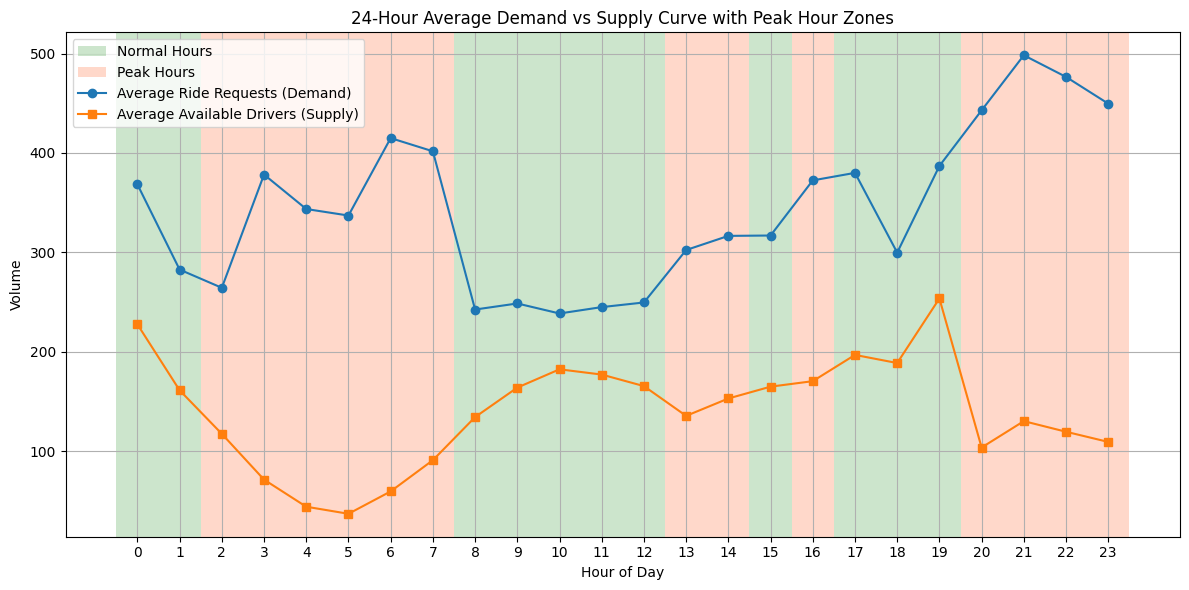

In [32]:
import numpy as np

hourly_avg['FF%'] = (hourly_avg['AvailableDrivers'] / hourly_avg['RidesRequests']) * 100

peak_hours = hourly_avg[hourly_avg['FF%'] < 50].index
normal_hours = hourly_avg[hourly_avg['FF%'] >= 50].index

plt.figure(figsize=(12,6))

for hour in range(24):
    if hour in peak_hours:
        plt.axvspan(hour - 0.5, hour + 0.5, facecolor='coral', alpha=0.3, label='Peak Hours' if hour == peak_hours[0] else "")
    elif hour in normal_hours:
        plt.axvspan(hour - 0.5, hour + 0.5, facecolor='green', alpha=0.2, label='Normal Hours' if hour == normal_hours[0] else "")

plt.plot(hourly_avg.index, hourly_avg['RidesRequests'], label='Average Ride Requests (Demand)', marker='o')
plt.plot(hourly_avg.index, hourly_avg['AvailableDrivers'], label='Average Available Drivers (Supply)', marker='s')

plt.title('24-Hour Average Demand vs Supply Curve with Peak Hour Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Volume')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Red Zones (Peak Hours):
These are hours where supply (free drivers) fails to meet even 50% of demand.

*   Example: 21:00 to 23:00 — massive demand spike, but very low supply.
*   Example: 5:00–7:00 — early morning demand likely for commuters, but low driver presence.

These hours are critical bottlenecks. Riders will likely wait longer, face unfulfilled requests, or give up.

→ You should incentivize drivers to log in here (surge pricing, push alerts, bonuses).

### Green Zones (Normal Hours):
Here, the available supply is sufficient to cover at least 50% of ride requests.



*   Example: 10:00–12:00 and 17:00–19:00 — demand is moderate, and supply is reasonable.

These hours are operationally acceptable. Minimal rider loss or churn expected.

→ Can focus less attention or possibly optimize costs by reducing incentives during these hours.

The chart clearly illustrates periods of critical undersupply (shaded in red), especially during early morning hours (5–7 AM), late evening (9–11 PM), and mid-afternoon peaks. These are peak hours with fulfillment rates under 50%, suggesting strong demand but inadequate available drivers. Strategic interventions such as driver scheduling, incentive programs, and shift balancing should target these zones to improve platform reliability and rider satisfaction.

---
lets now determine the **undersupplied hours during a weekly period** (Monday to Sunday).

This is a **heatmap** showing undersupplied hours across the entire week, and it's one of the most useful visual tools for scheduling and driver supply planning

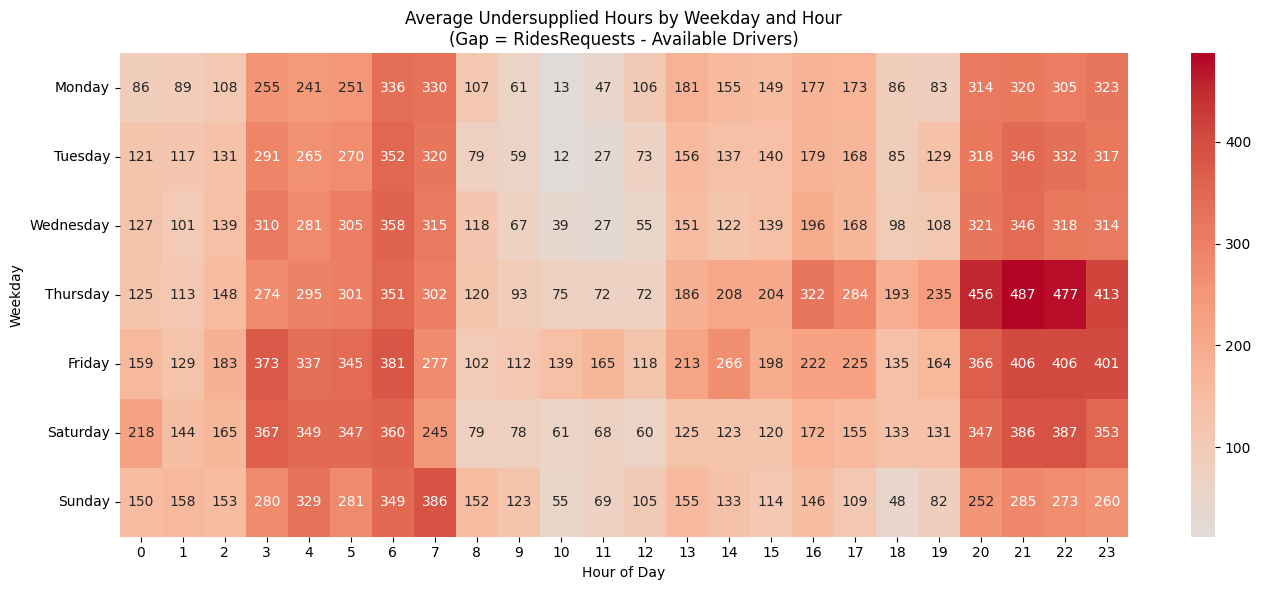

In [33]:
import seaborn as sns
merged['Gap'] = merged['RidesRequests'] - merged['AvailableDrivers']

pivot = merged.groupby(['WeekDay', 'hours'])['Gap'].mean().unstack()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(weekday_order)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="coolwarm", center=0, annot=True, fmt=".0f")
plt.title('Average Undersupplied Hours by Weekday and Hour\n(Gap = RidesRequests - Available Drivers)')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()


We can also create a line chart for each day in a week.

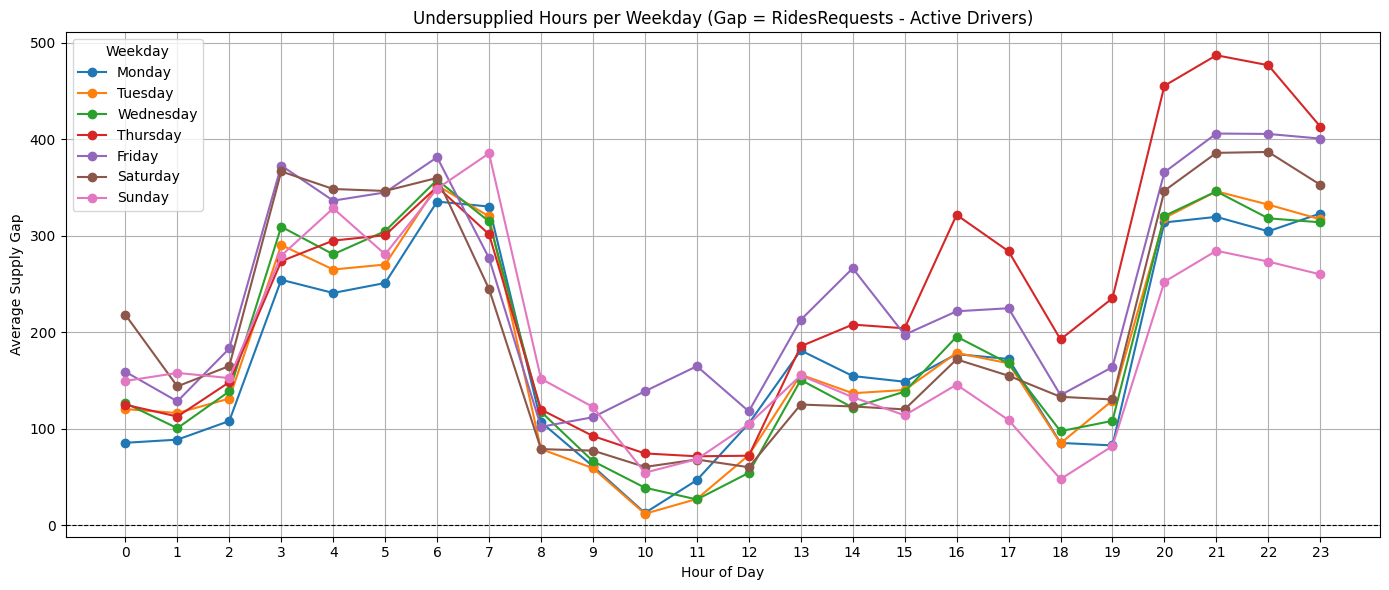

In [34]:
avg_gap = merged.groupby(['WeekDay', 'hours'])['Gap'].mean().reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_gap['WeekDay'] = pd.Categorical(avg_gap['WeekDay'], categories=weekday_order, ordered=True)
avg_gap = avg_gap.sort_values(['WeekDay', 'hours'])

plt.figure(figsize=(14,6))
for day in weekday_order:
    day_data = avg_gap[avg_gap['WeekDay'] == day]
    plt.plot(day_data['hours'], day_data['Gap'], label=day, marker='o')

plt.title('Undersupplied Hours per Weekday (Gap = RidesRequests - Active Drivers)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Supply Gap')
plt.xticks(range(0, 24))
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True)
plt.legend(title='Weekday')
plt.tight_layout()
plt.show()


What This Heatmap and Line chart Shows?



*   Rows: Days of the week (Monday to Sunday).
*   Columns: Hours of the day (0 to 23).
*   Cell value: Gap=RidesRequests−AvailableDrivers

---
### Red Zones = Critical Undersupply
These are the most problematic time slots. For example:


*   Thursday 20:00–22:00 → Gaps reach 456–487 ride requests unserved on average.
*   Friday 3:00–6:00 and Friday 21:00–23:00 → Similarly large unmet demand.

Insight: These are key peak periods when driver supply should be increased through:

*   Bonus incentives.
*   Shift planning.
*   Targeted push notifications.

---
### Orange Zones = Moderate Undersupply

*   Midday hours like 11:00–14:00 or 18:00–19:00 across many weekdays show gaps around 100–200.

These are less critical but still worth monitoring, especially if they align with events (school out, lunch breaks, etc.)

---
### Light Zones = Balanced or Near-Balanced Supply

*   Early morning hours (~8:00–10:00) on Monday to Wednesday.
*   Late night (e.g., 0:00–3:00).

These periods are not pressing. Driver supply during these times seems relatively aligned with demand.







### Weekly Seasonality (Monday–Sunday Patterns)

| **Day**              | **Observations**                                                                                 |
|----------------------|--------------------------------------------------------------------------------------------------|
| **Monday–Wednesday** | Relatively stable and moderate gaps; not very critical                                           |
| **Thursday**         | **Emerges as the worst single day**, especially 20:00–23:00 with gaps above **450–480**          |
| **Friday–Saturday**  | Elevated gaps all day long — especially in early morning (4:00–7:00) and late evening            |
| **Sunday**           | Still has high gaps, especially late night and morning, but slightly more balanced midday        |




---



---


## Part 2: Estimating Required Online Hours for Good Fulfillment



In economics, a good FF% is around 70%.

So that, our target in this part is to estimate the required online hours in order to achieve a FF% of 70%.



To calculate the Required number of rides to achieve a FF% of 70% we should multiply the "RidesRequests" with 0.70.

In [35]:
merged.columns

Index(['Date', 'TotalBoardedDrivers', 'Active Drivers', 'OnlineHours',
       'HasBooking', 'WaitingforBooking', 'HoursperActiveDriver',
       'RidesperOnlineHour', 'TotalPriceChecks', 'RidesRequests',
       'Unfulfilled Requests', 'RidesBoarded-Detailed', 'WeekDay', 'hours',
       'AvailableDrivers', 'Gap'],
      dtype='object')

In [36]:
merged['RequiredRides'] = merged['RidesRequests'] * 0.70

Now, we need to estimate the number of online hours using the "**RidesperOnlineHour**" column, by dividing the "**RequiredRides**" by the "**RidesperOnlineHour**".

This will give us an estimate for the required online hours needed to achieve 70% FF%.

In [37]:
merged['RequiredOnlineHours'] = merged['RequiredRides'] / merged['RidesperOnlineHour']

We can estimate the needed online hours per each day hour to achieve FF% = 70%.

This chart below shows the required online hour for each day hour, notice that the required online hours varies accross day hours.

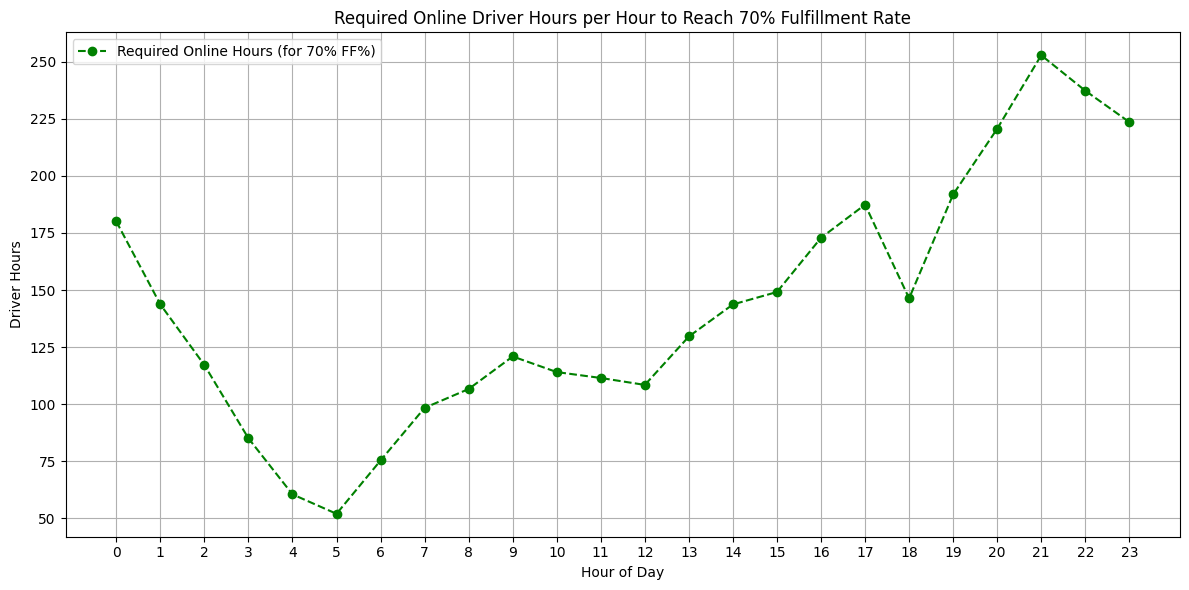

In [47]:
hourly_avg = merged.groupby('hours')[['RequiredOnlineHours']].mean()
plt.figure(figsize=(12,6))
plt.plot(hourly_avg.index, hourly_avg['RequiredOnlineHours'],
         label='Required Online Hours (for 70% FF%)',
         color='green', linestyle='--', marker='o')

plt.title('Required Online Driver Hours per Hour to Reach 70% Fulfillment Rate')
plt.xlabel('Hour of Day')
plt.ylabel('Driver Hours')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

This is a list of all required online hours per each day hour to achieve a 70% FF%.

In [39]:
hourly_avg['RequiredOnlineHours']

,RequiredOnlineHours
hours,
0,180.046321
1,143.671440
2,117.102604
3,84.988249
4,60.433782
5,51.908396
6,75.286800
7,98.355834
8,106.607792


In [40]:
hourly_avg['RequiredOnlineHours'].mean()

np.float64(142.86697786718574)

### **So, in average, we need to increase the number of online hours by 143 hours (per each hour) to achieve a good FF%.**

### **Which also means that we need to increase the online hours by 3,432 hours (per each day).**

### What the Chart Shows


*   Y-axis (Driver Hours): Total driver online time required to achieve a 70% fulfillment rate (FF%).
*   X-axis (Hour of Day): From 0 (midnight) to 23 (11 PM).
*   The green dashed line represents the **minimum total online hours** needed per hour (averaged across all days) to successfully **fulfill 70% of ride requests at that hour.**



### Peaks in the Line (Higher Required Hours)


*   Indicate times of high demand where you must staff more drivers to hit 70% FF%.
*   Example: 20:00–23:00 → You need 230–250+ online hours during these hours
→ This means high ride volume during these late evening hours




These are critical hours for driver incentives and scheduling — riders are requesting lots of rides, and you need a large driver force to keep fulfillment above 70%.

---

### Troughs in the Line (Lower Required Hours)


*   Show hours with lower demand.
*   Example: 4:00–6:00 AM → Needs only ~50–75 driver hours
→ Likely fewer ride requests at those hours.

Action: You can scale down driver operations here or reduce incentives.

This chart reveals the minimum online driver hours required per hour to achieve a 70% fulfillment rate. Demand sharply rises from late afternoon through midnight, peaking between 20:00–23:00, where the platform must sustain over 230–250 online hours.
Conversely, early morning hours (3:00–6:00 AM) require minimal supply, highlighting opportunities for operational cost optimization. This visualization is key for driver shift planning, incentive timing, and coverage balancing.

---


---



## Part 3: Forecasting Impact of Competitor Exit and Strategic Recommendations

In week 15, we expect a 15% increase in the online hours, also, we expect a 50% increase in the total number of price checks, which potentially leads to an increase in the ride requests.

Given these information, we want to predict the number of boarded rides we will have in week 15.

### Boarded Rides for week 15 = online hours for week 15 * rides per online hour for week 15

Lets estimate the number of online hours for week 15.

online hours for week 15 = online hours for week 14 * 1.15 (sense the 15% increase)

In [41]:
merged['WeekNum'] = pd.to_datetime(merged['Date']).dt.isocalendar().week

In [42]:
week14 = merged[merged['WeekNum'] == 14]
total_online_hours_14 = week14['OnlineHours'].sum()
total_online_hours_15 = total_online_hours_14 * 1.15
total_online_hours_15

np.float64(27994.392499999994)

Based on these calculations, the summation of total online hours in week 15 will be approximately = 27994.3

### **0nline hours for week 15 = 27994.3**

Now lets estimate how the 50% increase in the total price checks will affect the number of rides per online hours.

When the total **price checks** increase -> the total **ride requests** will increase

When the total **ride requests** increase -> the **rides per online hours** will increase

---

But the relationship between the price checks and rides per online hours **is not necessarily to be linearly proportional!**

Which means that a 50% increase in prices checks might not lead to 50% increase in rides per online hour.

So that, we will calculate the **correlation** between the rides per online hour and the total price checks, and **use this correlation as a weight to estimate the increase in rides per hour.**

In [43]:
merged['RidesperOnlineHour'].corr(merged['TotalPriceChecks'])

np.float64(0.24402026531281543)

This means that the correlation between the rides per online hour and the total price checks = 0.24, which considered as weak to moderate positive correlation.

Lets plot the scatter plot between these two variables to test if a correlation of 0.24 makes sense.

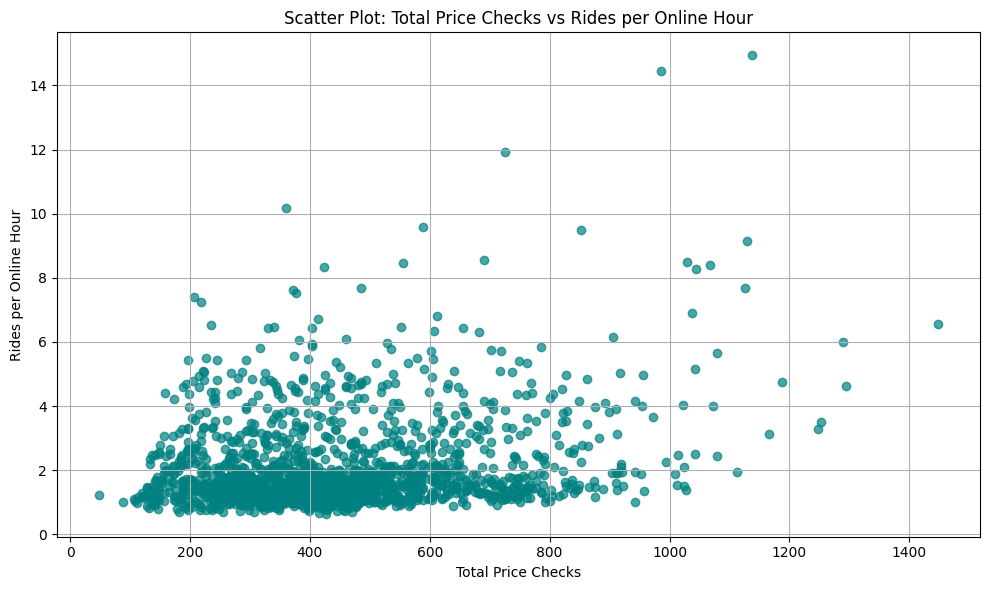

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(merged["TotalPriceChecks"], merged["RidesperOnlineHour"], alpha=0.7, color='teal')
plt.title("Scatter Plot: Total Price Checks vs Rides per Online Hour")
plt.xlabel("Total Price Checks")
plt.ylabel("Rides per Online Hour")
plt.grid(True)
plt.tight_layout()
plt.show()

This aligns with the low correlation coefficient (≈ 0.244) we calculated earlier, we are on the right path.

### Now, an increase of 50% in the total price checks will lead to an increase of **(50% * 0.24) = 12.2%**

### **Rides per online hour for week 15 = Rides per online hour for week 14 * 1.122**



In [45]:
week14 = merged[merged['WeekNum'] == 14]
rides_per_online_hour_14 = week14['RidesperOnlineHour'].mean()
rides_per_online_hour_15 = rides_per_online_hour_14 * 1.122
rides_per_online_hour_15

np.float64(2.0206908333333335)

Based on this, the average number of rides per online hours in week 15 is approximately = 2.02

### **Rides per online hours for week 15 = 2.02**



---

### Boarded Rides for week 15 = online hours for week 15 * rides per online hour for week 15

### **Boarded Rides for week 15 = 27,994.3 * 2.02 = 56,548.5**

### using the same logic, we can estimate the expected boarded rides for each day in week 15 as follows:

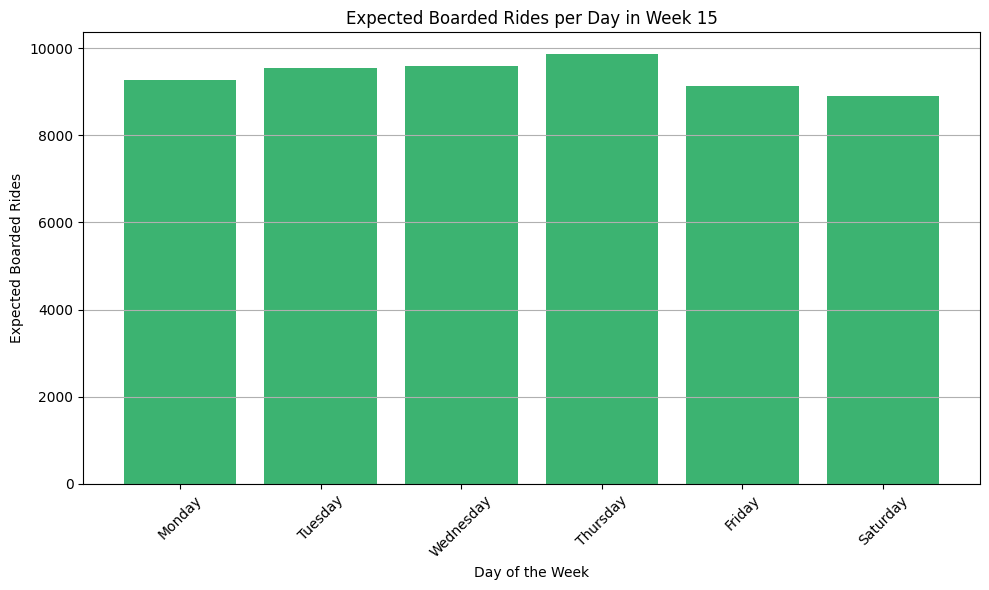

In [46]:
daily_summary = week14.groupby('WeekDay').agg({
    'OnlineHours': 'sum',
    'RidesperOnlineHour': 'mean'
})

daily_summary['OnlineHours_W15'] = daily_summary['OnlineHours'] * 1.15
daily_summary['RidesperOnlineHour_W15'] = daily_summary['RidesperOnlineHour'] * 1.122

daily_summary['BoardedRides_W15'] = daily_summary['OnlineHours_W15'] * daily_summary['RidesperOnlineHour_W15']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_summary = daily_summary.reindex(weekday_order)

plt.figure(figsize=(10,6))
plt.bar(daily_summary.index, daily_summary['BoardedRides_W15'], color='mediumseagreen')
plt.title('Expected Boarded Rides per Day in Week 15')
plt.xlabel('Day of the Week')
plt.ylabel('Expected Boarded Rides')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



---

## Advice to Jeeny’s GM to Improve Boarded Rides Further



1.   **Align Driver Supply with Peak Demand Hours**

     My previous analysis (hourly gaps, FF%, and required online hours) shows that demand is not evenly distributed throughout the day.

     Use hourly-level FF% and gap analysis to pinpoint critical undersupplied hours.

     Offer time-based incentives to get more drivers online during those periods.

2.   **Train Drivers to Operate Efficiently**

      Drivers can underperform even in high-demand environments due to lack of experience or bad location choices.

      Encourage drivers to stay in hot zones and accept rides quickly.
      
3.    **Monitor and Improve Fulfillment Rate (FF%)**

      Set minimum FF% targets by hour and area.

      Use real-time alerts for operations team when FF% drops below 70%.

